In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
events = pd.read_csv('events.csv.gzip', compression='gzip', 
                     dtype={
                         'device_countrycode': 'category', 
                         'device_city': 'category',
                         'ref_type': 'category',
                         'application_id': 'uint16',
                         'device_os_version': 'category',
                         'device_brand': 'category',
                         'device_model': 'category',
                         'session_user_agent': 'category',
                         'trans_id': 'category',
                         'user_agent': 'category',
                         'carrier': 'category',
                         'device_os': 'category',
                         'device_os_version': 'category',
                         'device_language': 'category',
                         'connection_type': 'category',
                         'wifi': 'category'
                     })

In [93]:
clicks = pd.read_csv('clicks.csv.gzip', compression = 'gzip')

In [94]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731902e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [95]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [96]:
events['device_countrycode'].value_counts()
del events['device_countrycode']

In [97]:
clicks['country_code'].value_counts() #El país es uno solo y además es el mismo en ambos, así que se borra 
del clicks['country_code']

In [98]:
events['trans_id'].value_counts()
del events['trans_id']

In [99]:
clicks['trans_id'].value_counts() #Los trans id son únicos y ninguno coincide, además en events hay demasiado pocos, por eso se borra la columna
del clicks['trans_id']

In [100]:
clicks['action_id'].count() #Columna vacía, se borra
del clicks['action_id']

In [101]:
clicks['wifi_connection'].value_counts() #Todos False, no aporta información relevante
del clicks['wifi_connection']

In [102]:
events['event_uuid'].value_counts() #Es un código único y no aporta información relevante
del events['event_uuid']

In [103]:
events['ip_address'].value_counts() #No la voy a utilizar porque no me aporta info relevante
del events['ip_address']

In [104]:
events.loc[:,'date'] = pd.to_datetime(events['date'], errors = 'coerce')

In [105]:
clicks.loc[:,'created'] = pd.to_datetime(clicks['created'], errors = 'coerce')

In [106]:
clicks.count()

advertiser_id    26351
source_id        26351
created          26351
latitude         26351
longitude        26351
carrier_id       26340
os_minor         26339
agent_device      3243
os_major         26339
specs_brand      26351
brand             6235
timeToClick      22977
touchX           23011
touchY           23011
ref_type         26351
ref_hash         26351
dtype: int64

In [107]:
events.shape

(2494423, 18)

In [108]:
clicks.shape

(26351, 16)

In [109]:
clicksAndEvents = pd.merge(clicks, events, on = 'ref_hash', how = 'inner')

In [110]:
clicksAndEvents.head()

,advertiser_id,source_id,created,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,...,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,wifi,connection_type,device_language
0,0,0,2019-03-08 15:24:16.069000+00:00,1.205689,1.070234,6.0,5.975656e+18,NaN,3.072849e+18,392184377613098015,...,7.300381905359388e+18,NaN,3.348571836234444e+18,NaN,NaN,5.104972e+18,NaN,NaN,NaN,6.111820034171223e+18
1,0,0,2019-03-08 15:24:16.069000+00:00,1.205689,1.070234,6.0,5.975656e+18,NaN,3.072849e+18,392184377613098015,...,7.300381905359388e+18,NaN,3.348571836234444e+18,NaN,NaN,5.104972e+18,NaN,NaN,NaN,6.111820034171223e+18
2,0,0,2019-03-08 15:24:16.069000+00:00,1.205689,1.070234,6.0,5.975656e+18,NaN,3.072849e+18,392184377613098015,...,7.300381905359388e+18,NaN,3.348571836234444e+18,NaN,NaN,5.104972e+18,NaN,NaN,NaN,6.111820034171223e+18
3,0,0,2019-03-08 15:24:16.069000+00:00,1.205689,1.070234,6.0,5.975656e+18,NaN,3.072849e+18,392184377613098015,...,7.300381905359388e+18,NaN,3.348571836234444e+18,NaN,NaN,5.104972e+18,NaN,NaN,NaN,6.111820034171223e+18
4,0,0,2019-03-08 15:24:16.069000+00:00,1.205689,1.070234,6.0,5.975656e+18,NaN,3.072849e+18,392184377613098015,...,7.300381905359388e+18,NaN,3.348571836234444e+18,NaN,NaN,2.376750e+18,NaN,NaN,NaN,6.111820034171223e+18


In [111]:
#Las columnas coinciden, entonces puedo borrar una
del clicksAndEvents['ref_type_x']

In [112]:
clicksAndEvents.count()

advertiser_id         23655
source_id             23655
created               23655
latitude              23655
longitude             23655
carrier_id            23425
os_minor              23627
agent_device           2785
os_major              23627
specs_brand           23655
brand                  7217
timeToClick           18744
touchX                19744
touchY                19744
ref_hash              23655
date                  23655
event_id              23655
ref_type_y            23655
application_id        23655
attributed            23655
device_os_version      7811
device_brand          15016
device_model          23235
device_city            4622
session_user_agent    23108
user_agent            15511
carrier                4647
kind                  23265
device_os              4910
wifi                  15478
connection_type        4647
device_language       23238
dtype: int64

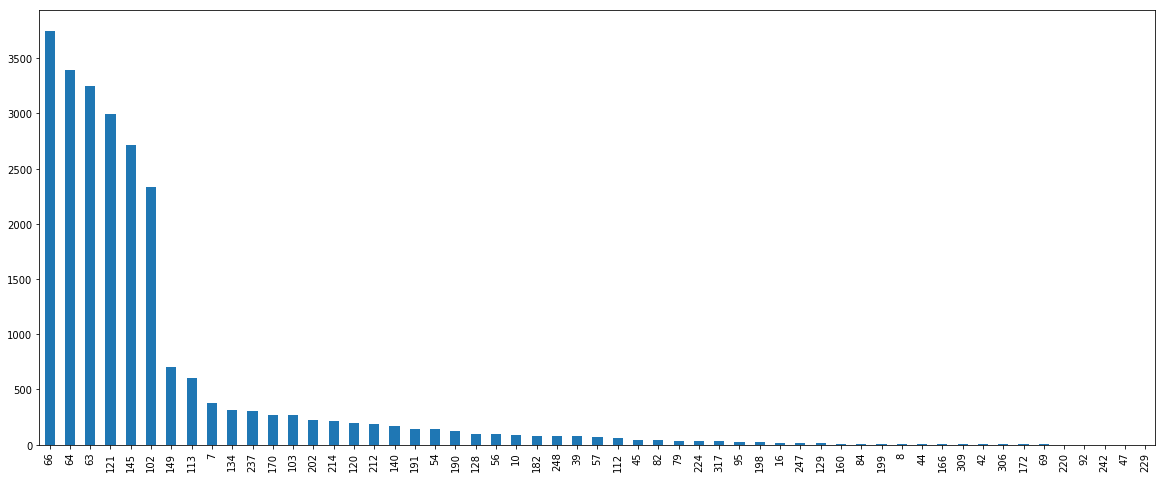

In [214]:
clicksAndEvents['application_id'].value_counts().plot(kind = 'bar', figsize = (20,8))
plt.show()

In [114]:
clicksAndEvents['advertiser_id'].value_counts()

3    21923
0     1727
8        5
Name: advertiser_id, dtype: int64

In [123]:
clicksAndEvents.dtypes

advertiser_id                       int64
source_id                           int64
created               datetime64[ns, GMT]
latitude                          float64
longitude                         float64
carrier_id                        float64
os_minor                          float64
agent_device                      float64
os_major                          float64
specs_brand                         int64
brand                             float64
timeToClick                       float64
touchX                            float64
touchY                            float64
ref_hash                            int64
date                  datetime64[ns, GMT]
event_id                            int64
ref_type_y                       category
application_id                     uint16
attributed                           bool
device_os_version                category
device_brand                     category
device_model                     category
device_city                      c

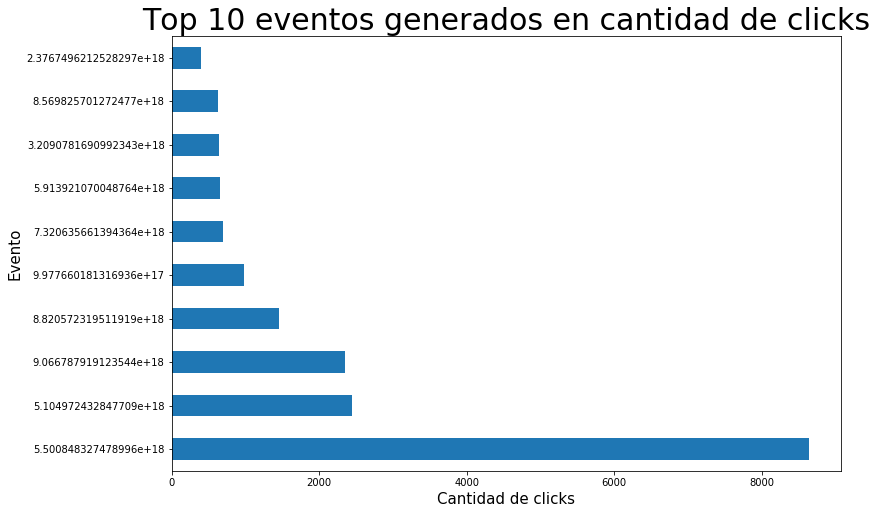

In [141]:
clicksAndEvents['kind'].value_counts().nlargest(10).plot(kind = 'barh', figsize = (12,8))
plt.title('Top 10 eventos generados en cantidad de clicks', size = 30)
plt.xlabel('Cantidad de clicks', size = 15)
plt.ylabel('Evento', size = 15)
plt.show()

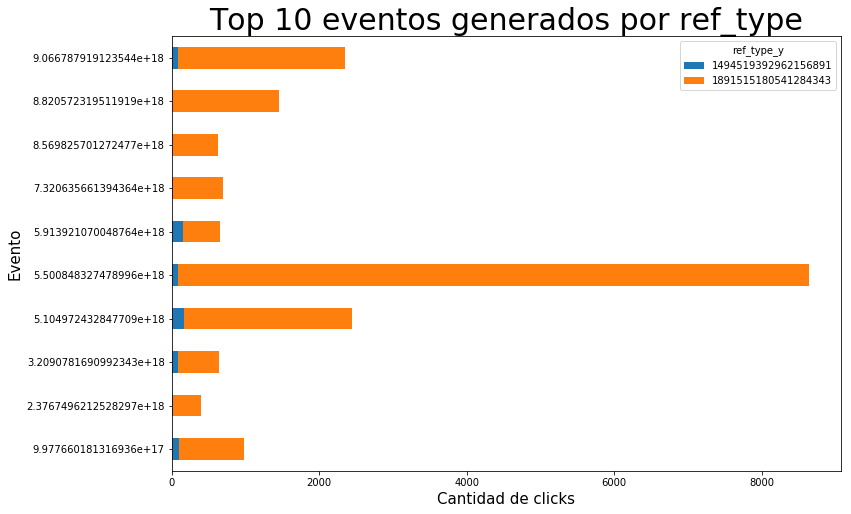

In [146]:
#Creo que este gráfico sería mejor hacerlo con porcentajes en vez de cantidades
indexes = clicksAndEvents['kind'].value_counts().nlargest(10).index
top10events = clicksAndEvents[clicksAndEvents['kind'].isin(indexes)]
refs = top10events[['kind', 'ref_type_y']].groupby('kind').agg({'ref_type_y' : 'value_counts'})
refs['ref_type_y'].unstack().plot(kind = 'barh', figsize = (12,8), stacked = True)
plt.title('Top 10 eventos generados por ref_type', size = 30)
plt.xlabel('Cantidad de clicks', size = 15)
plt.ylabel('Evento', size = 15)
plt.show()

In [176]:
counts = top10events['application_id'].value_counts()
indexes = counts[counts<1000].index
mask_dict = dict.fromkeys(indexes, 'other')
top10events.loc[:,'application_id'] = top10events['application_id'].replace(mask_dict)

In [177]:
top10events['application_id'].value_counts()

66       3702
64       3355
145      2667
121      2622
63       2598
102      2093
other    1844
Name: application_id, dtype: int64

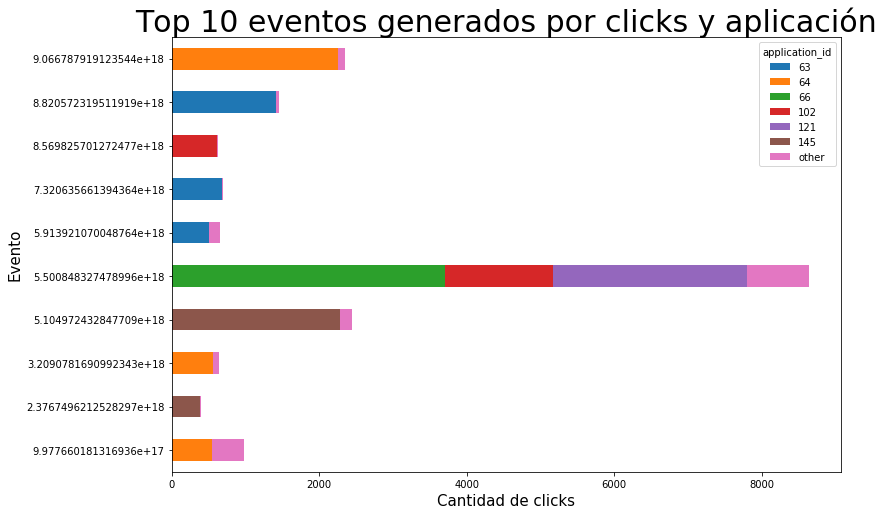

In [178]:
refs = top10events[['kind', 'application_id']].groupby('kind').agg({'application_id' : 'value_counts'})
refs['application_id'].unstack().plot(kind = 'barh', figsize = (12,8), stacked = True)
plt.title('Top 10 eventos generados por clicks y aplicación', size = 30)
plt.xlabel('Cantidad de clicks', size = 15)
plt.ylabel('Evento', size = 15)
plt.show()

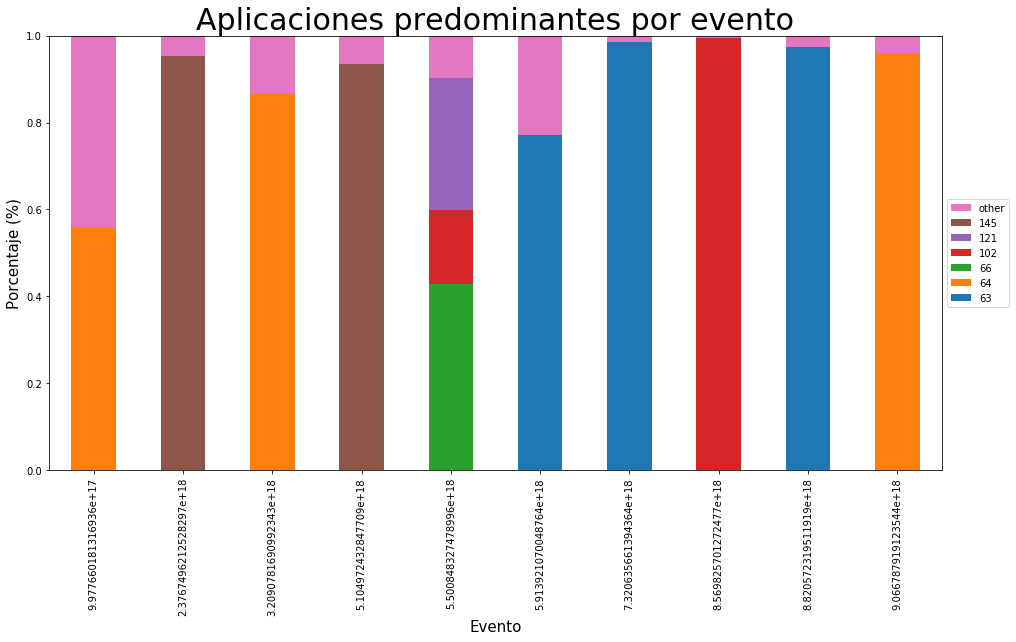

In [180]:
us = pd.DataFrame(top10events.groupby(['kind','application_id']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'application_id', index = 'kind')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['63', '64', '66', '102', '121', '145', 'other']
f = plt.figure()
plt.title('Aplicaciones predominantes por evento',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Evento', size = 15);
ax.set_ylim(0,1)
plt.show()

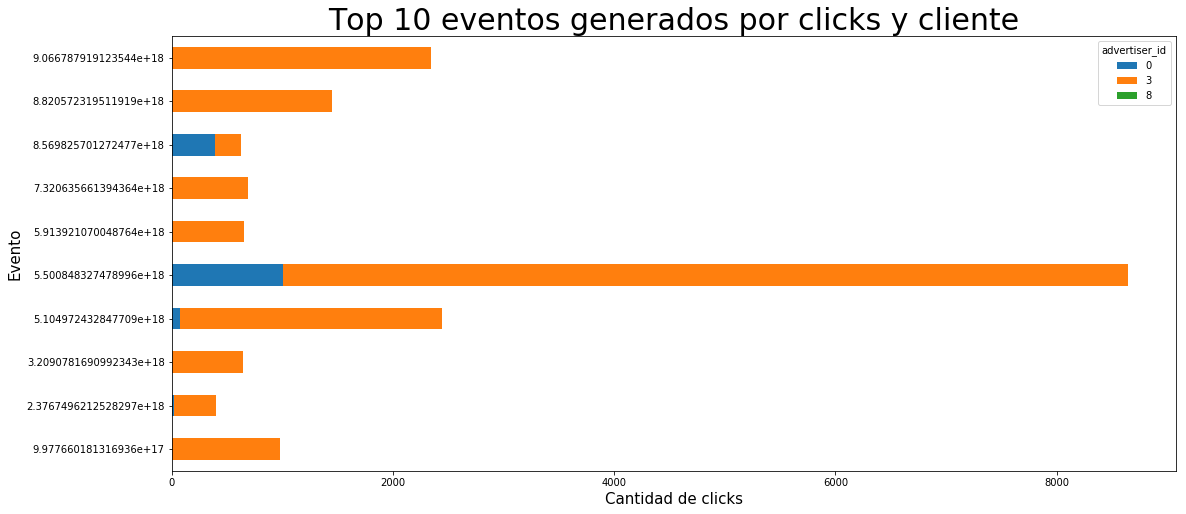

In [211]:
adv = top10events[['kind', 'advertiser_id']].groupby('kind').agg({'advertiser_id' : 'value_counts'})
adv['advertiser_id'].unstack().plot(kind = 'barh', figsize = (18,8), stacked = True)
plt.title('Top 10 eventos generados por clicks y cliente', size = 30)
plt.xlabel('Cantidad de clicks', size = 15)
plt.ylabel('Evento', size = 15)
plt.show()

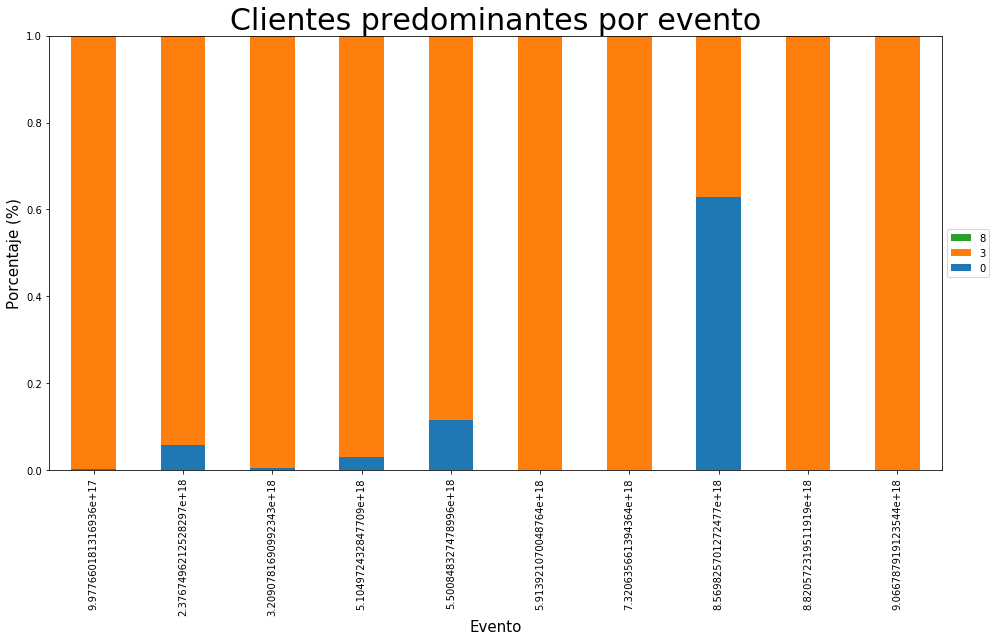

In [213]:
us = pd.DataFrame(top10events.groupby(['kind','advertiser_id']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'advertiser_id', index = 'kind')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['0', '3', '8']
f = plt.figure()
plt.title('Clientes predominantes por evento',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Evento', size = 15);
ax.set_ylim(0,1)
plt.show()

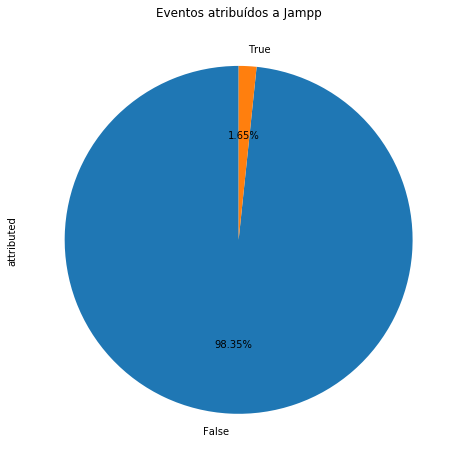

In [135]:
clicksAndEvents['attributed'].value_counts().plot(kind = 'pie', figsize = (12,8), startangle = 90, autopct = '%1.2f%%')
plt.title('Eventos atribuídos a Jampp')
plt.show()

In [198]:
top = top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]]
top['coordenadas'] = top[['longitude','latitude']].apply(tuple, axis = 1)
cant = top['coordenadas'].value_counts()
cant_dict = cant.to_dict()
top['count'] = top['coordenadas'].map(cant_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


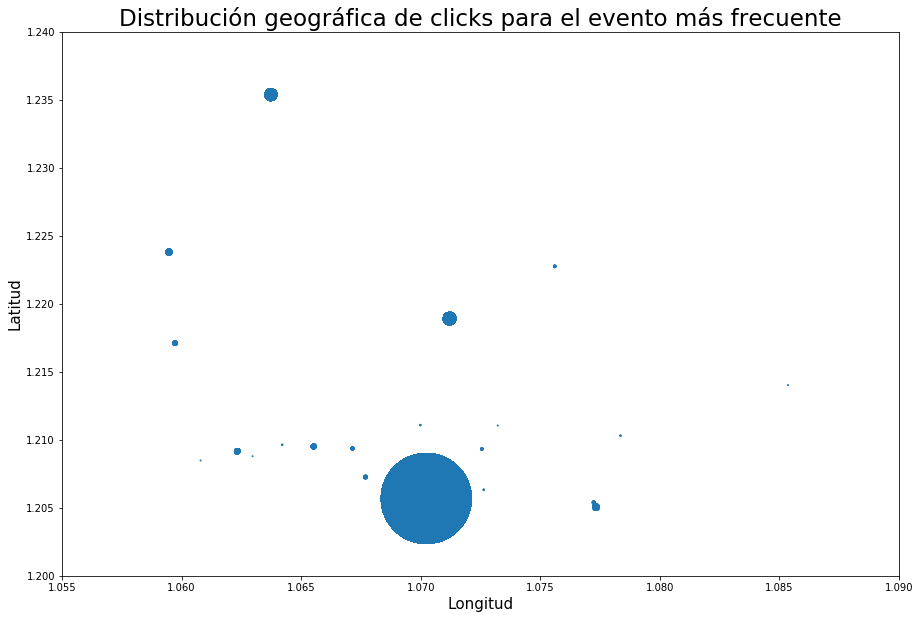

In [217]:
top.plot.scatter('longitude', 'latitude', figsize = (15,10), s = 1*top['count'], xlim = (1.055, 1.090), ylim = (1.2, 1.24))
plt.title('Distribución geográfica de clicks para el evento más frecuente', size = 23)
plt.xlabel('Longitud', size = 15)
plt.ylabel('Latitud', size = 15)
plt.show()

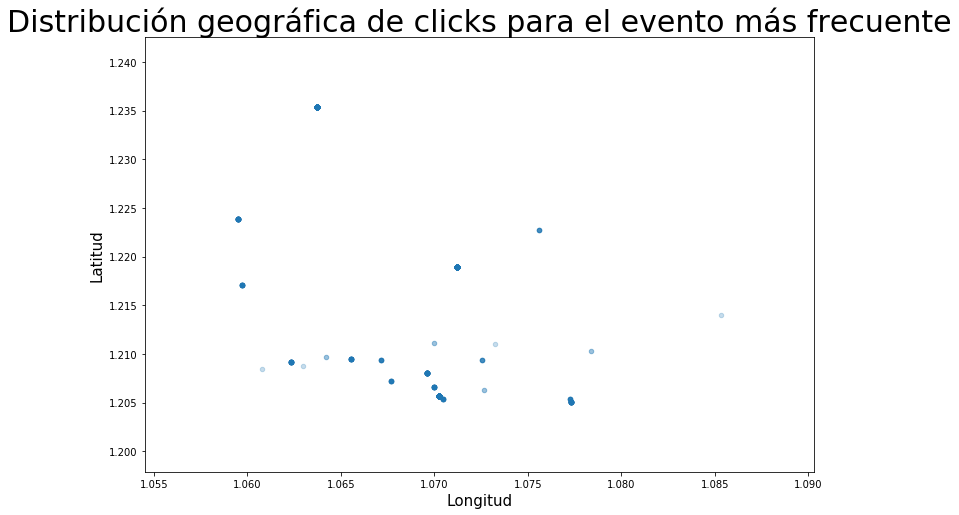

In [203]:
top.plot.scatter('longitude', 'latitude', figsize = (12,8), alpha = 0.25)
plt.title('Distribución geográfica de clicks para el evento más frecuente', size = 30)
plt.xlabel('Longitud', size = 15)
plt.ylabel('Latitud', size = 15)
plt.show()

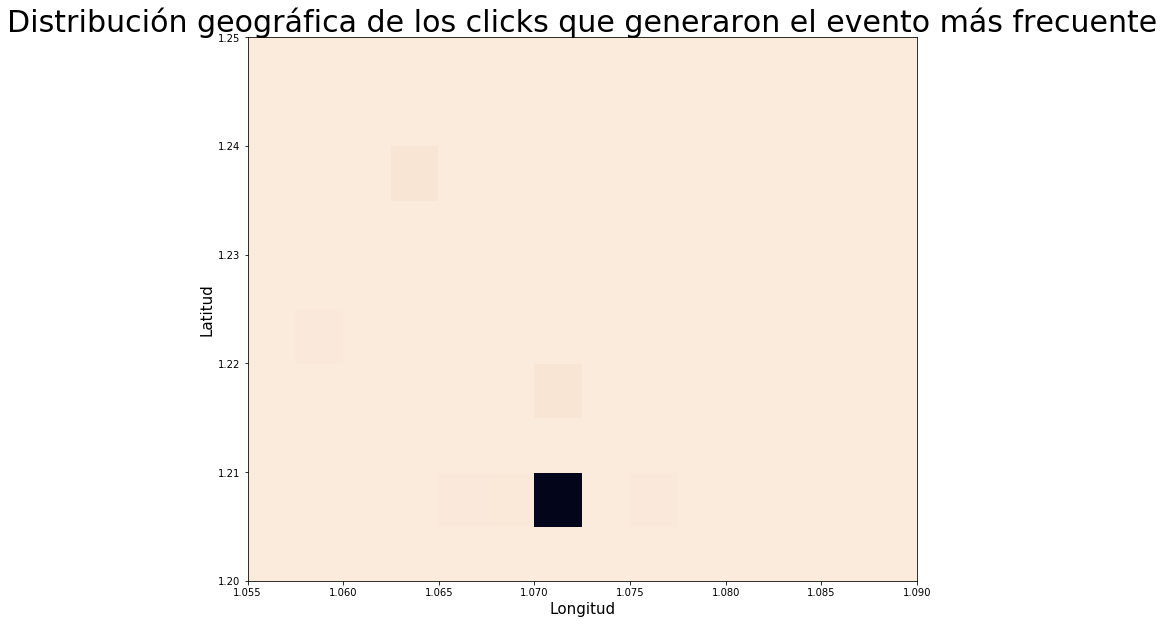

In [160]:
x = top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]]['longitude']
y = top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]]['latitude']
plt.figure(figsize = (12,10))
plt.hist2d(x, y, bins = [np.arange(1.055, 1.09, 0.0025), np.arange(1.2, 1.25, 0.005)], cmap = sns.cm.rocket_r)
plt.title('Distribución geográfica de los clicks que generaron el evento más frecuente', size = 30)
plt.xlabel('Longitud', size = 15)
plt.ylabel('Latitud', size = 15)
plt.show()

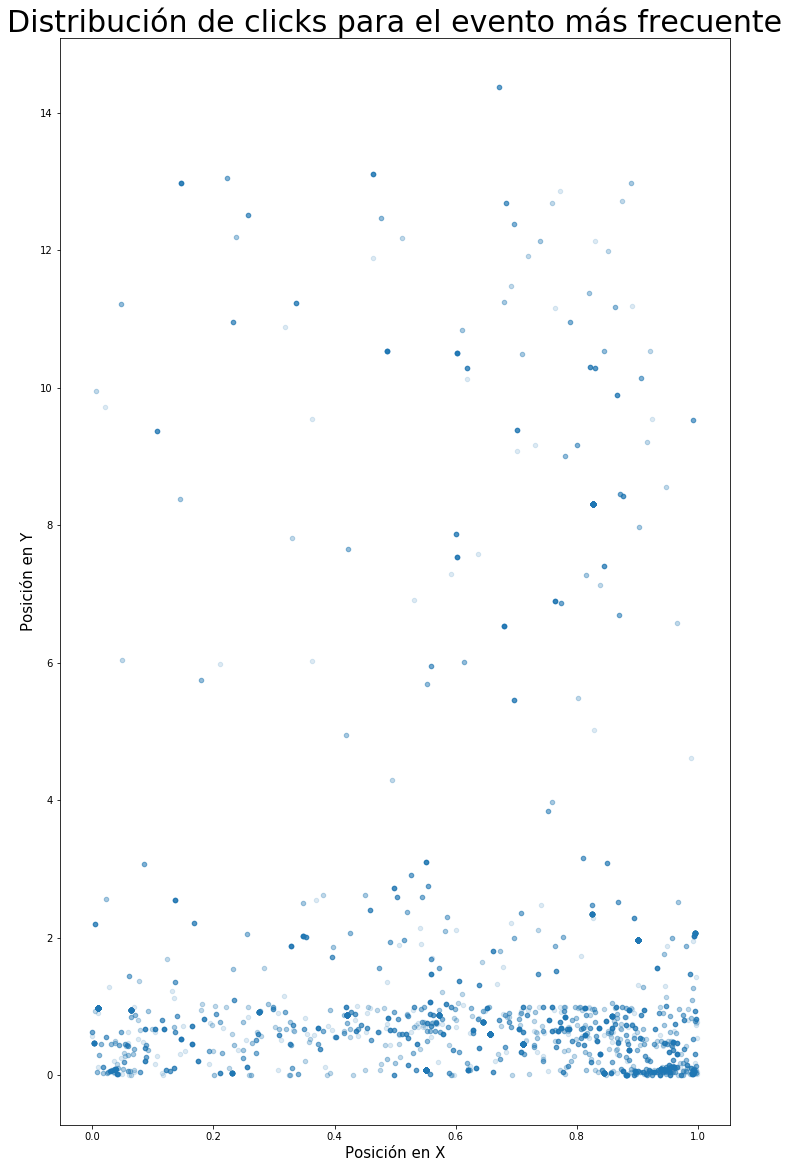

In [219]:
top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]].plot.scatter('touchX', 'touchY', figsize = (12,20), alpha = 0.15)
plt.title('Distribución de clicks para el evento más frecuente', size = 30)
plt.xlabel('Posición en X', size = 15)
plt.ylabel('Posición en Y', size = 15)
plt.show()

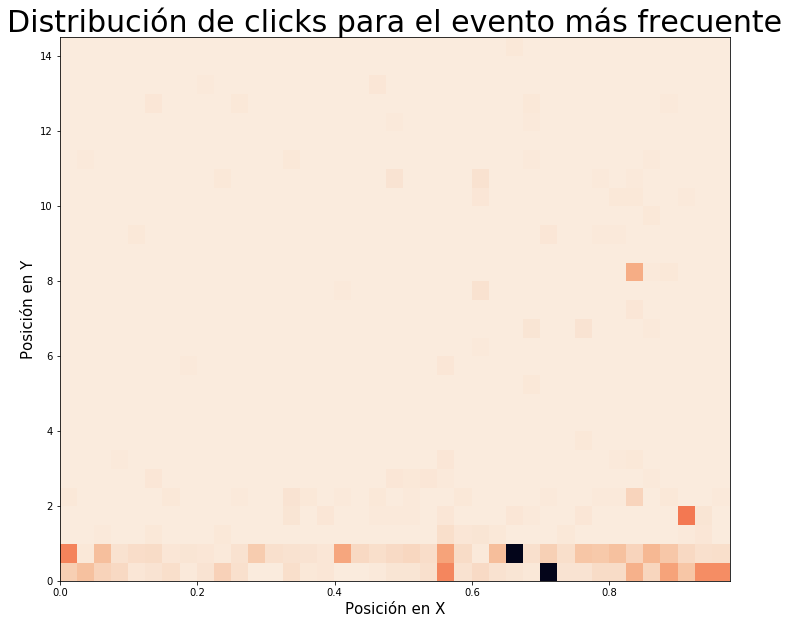

In [166]:
#Hice los dos pero me parece mejor el scatter plot
x = top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]]['touchX']
y = top10events[top10events['kind'] == top10events['kind'].value_counts().index[0]]['touchY']
plt.figure(figsize = (12,10))
plt.hist2d(x, y, bins = [np.arange(0, 1, 0.025), np.arange(0, 15, 0.5)], cmap = sns.cm.rocket_r)
plt.title('Distribución de clicks para el evento más frecuente', size = 30)
plt.xlabel('Posición en X', size = 15)
plt.ylabel('Posición en Y', size = 15)
plt.show()

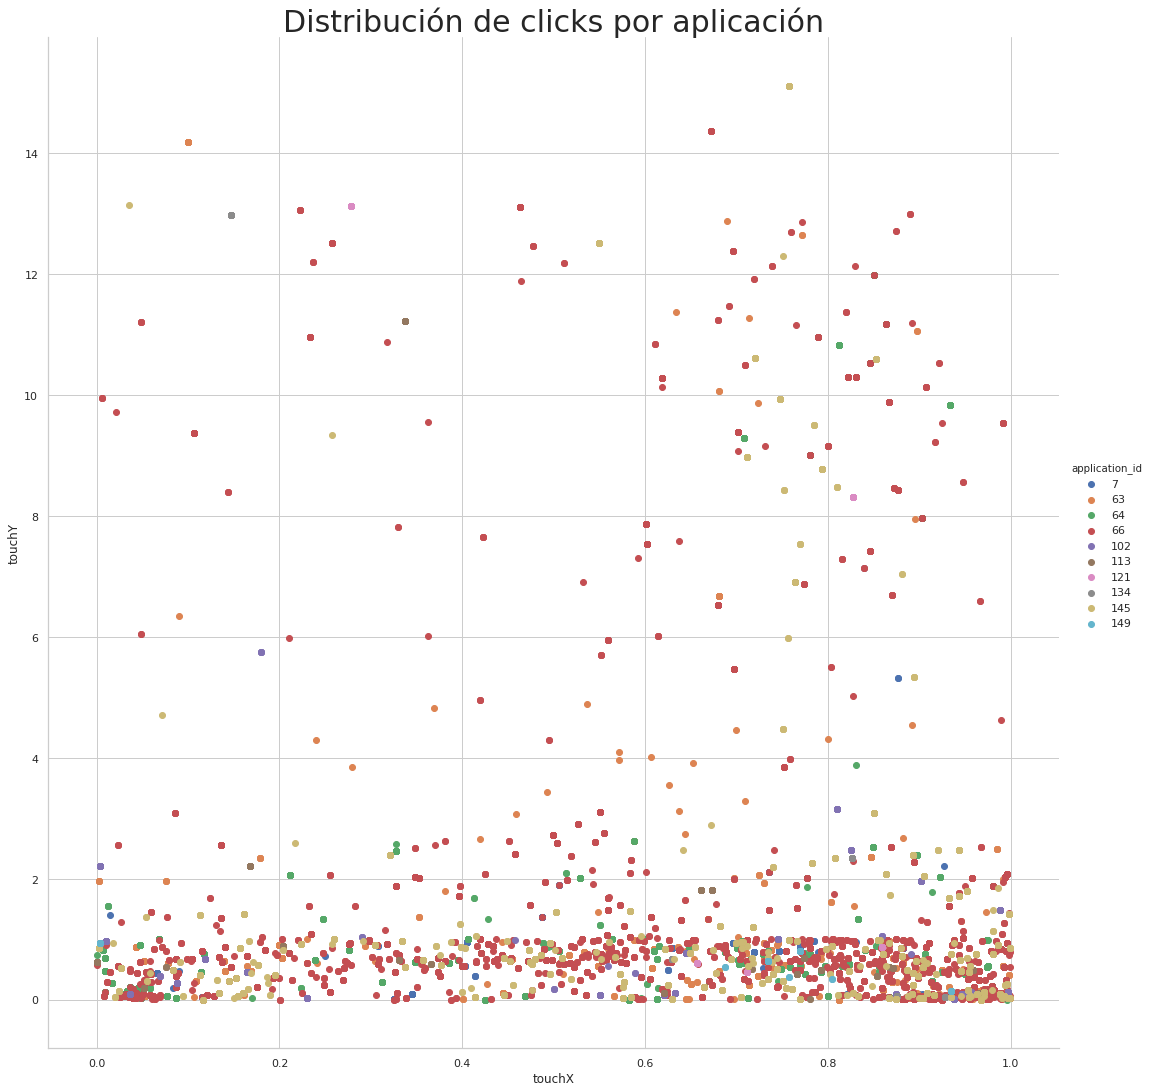

In [235]:
indexes = clicksAndEvents['application_id'].value_counts().nlargest(10).index
top10apps = clicksAndEvents[clicksAndEvents['application_id'].isin(indexes)]
sns.set(style = 'whitegrid')
fg = sns.FacetGrid(data=top10apps, hue='application_id', height = 15)
fg.map(plt.scatter, 'touchX', 'touchY').add_legend()
plt.title('Distribución de clicks por aplicación', size = 30)
plt.show()

In [234]:
clicksAndEvents['advertiser_id'].value_counts()

3    21923
0     1727
8        5
Name: advertiser_id, dtype: int64

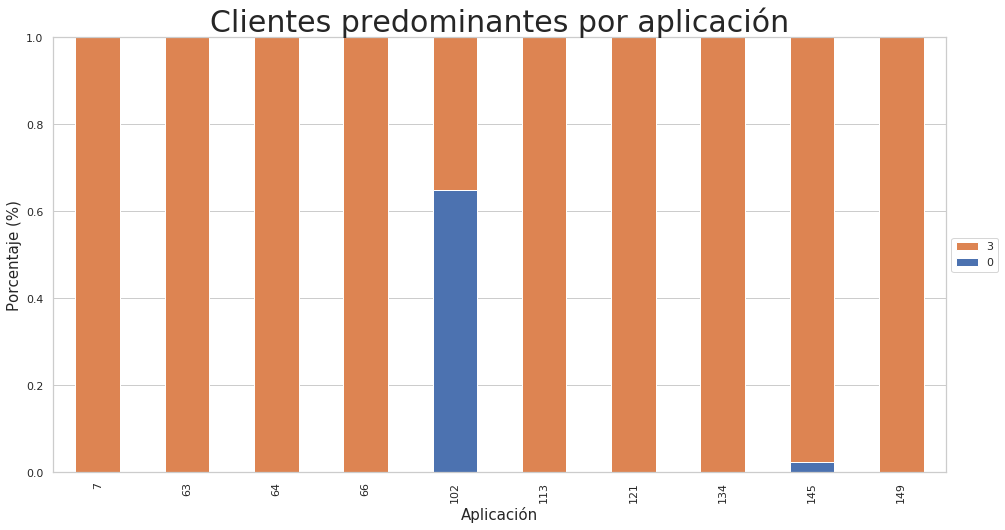

In [292]:
us = pd.DataFrame(top10apps.groupby(['application_id','advertiser_id']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'advertiser_id', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['0', '3']
f = plt.figure()
plt.title('Clientes predominantes por aplicación',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

In [240]:
top10apps['advertiser_id'] = top10apps['advertiser_id'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [251]:
top10apps['application_id'] = top10apps['application_id'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


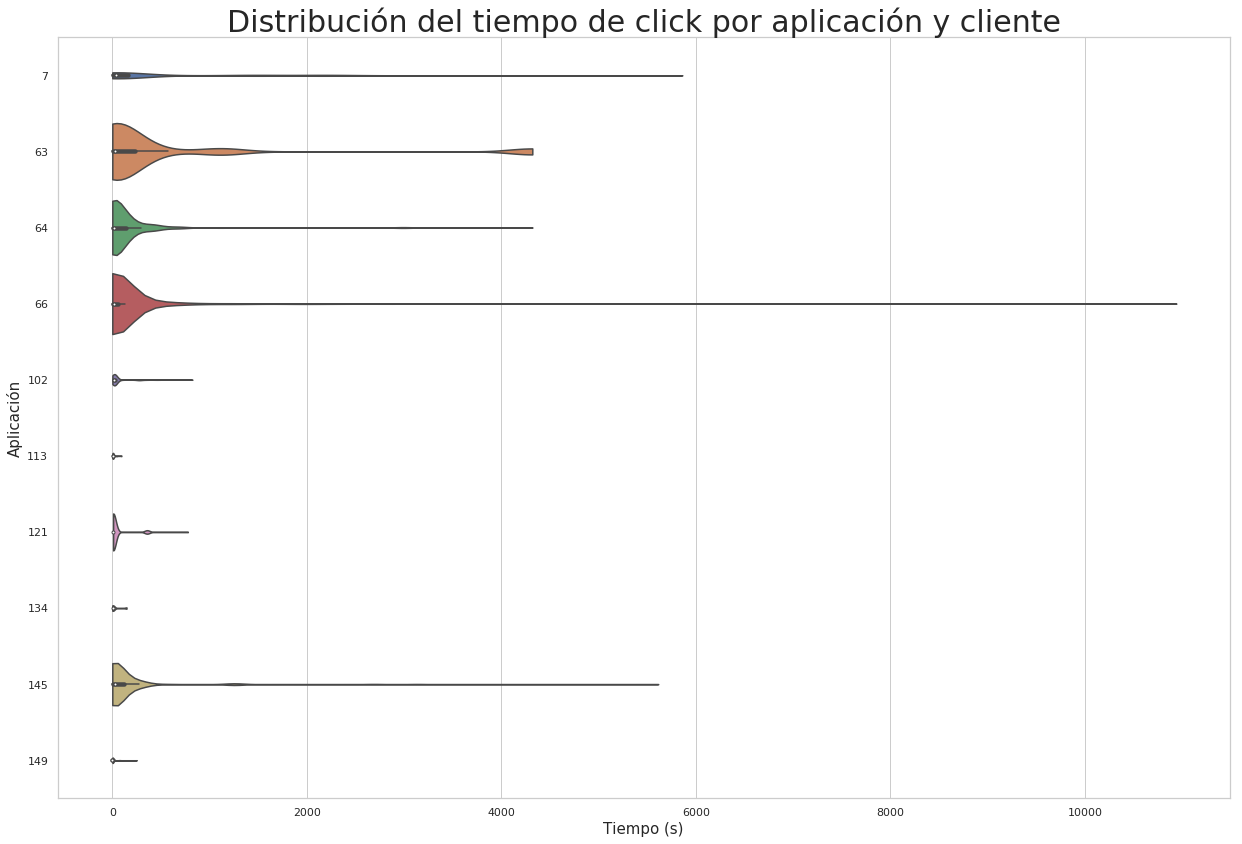

In [293]:
#Quizás convendría dividirlo en dos este gráfico
plt.figure(figsize = (21,14))
sns.set(style = 'whitegrid')
sns.violinplot(x = 'timeToClick', y = 'application_id', data = top10apps, scale = 'count', inner = 'box', cut = 0)
plt.title('Distribución del tiempo de click por aplicación y cliente', size = 30)
plt.xlabel('Tiempo (s)', size = 15)
plt.ylabel('Aplicación', size = 15)
plt.show()

In [294]:
top10apps[top10apps['advertiser_id'] == 0]['application_id'].value_counts()

102    1511
145      65
66        6
149       0
134       0
121       0
113       0
64        0
63        0
7         0
Name: application_id, dtype: int64

In [267]:
clicksAndEvents.count()

advertiser_id         23655
source_id             23655
created               23655
latitude              23655
longitude             23655
carrier_id            23425
os_minor              23627
agent_device           2785
os_major              23627
specs_brand           23655
brand                  7217
timeToClick           18744
touchX                19744
touchY                19744
ref_hash              23655
date                  23655
event_id              23655
ref_type_y            23655
application_id        23655
attributed            23655
device_os_version      7811
device_brand          15016
device_model          23235
device_city            4622
session_user_agent    23108
user_agent            15511
carrier                4647
kind                  23265
device_os              4910
wifi                  15478
connection_type        4647
device_language       23238
dtype: int64

In [268]:
top10apps['os_major'].value_counts()

3.072849e+18    6889
1.774085e+18    5880
4.566454e+18    4155
7.452406e+18    2509
1.563830e+18     981
5.745805e+18      11
6.693579e+18       2
Name: os_major, dtype: int64

In [287]:
top10apps['session_user_agent'].value_counts().nsmallest(1458).sum()

2714